In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PRDECT-ID Dataset.csv')

# Data Cleaning

In [3]:
df.isnull().sum()

Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

In [4]:
df.duplicated().sum()

7

In [5]:
df.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)

# Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5305 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5305 non-null   object 
 1   Product Name     5305 non-null   object 
 2   Location         5305 non-null   object 
 3   Price            5305 non-null   int64  
 4   Overall Rating   5305 non-null   float64
 5   Number Sold      5305 non-null   int64  
 6   Total Review     5305 non-null   int64  
 7   Customer Rating  5305 non-null   int64  
 8   Customer Review  5305 non-null   object 
 9   Sentiment        5305 non-null   object 
 10  Emotion          5305 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 497.3+ KB


In [7]:
df.drop('Product Name', axis=1, inplace=True)
df.drop('Customer Review', axis=1, inplace=True)
df.drop('Total Review', axis=1, inplace=True)

In [8]:
x = df[['Category','Location','Price','Overall Rating','Number Sold','Customer Rating','Sentiment']]
y = df['Emotion']

In [9]:
label_encoders = {}
for categorical_col in x.columns:
    if x[categorical_col].dtype == object:
        label_encoders[categorical_col] = LabelEncoder()
        x.loc[:, categorical_col] = label_encoders[categorical_col].fit_transform(x[categorical_col])

In [10]:
label_encoders['Emotion'] = LabelEncoder()
y = label_encoders['Emotion'].fit_transform(y)

In [11]:
df

,Category,Location,Price,Overall Rating,Number Sold,Customer Rating,Sentiment,Emotion
0,Computers and Laptops,Jakarta Utara,53500,4.9,5449,5,Positive,Happy
1,Computers and Laptops,Kota Tangerang Selatan,72000,4.9,2359,5,Positive,Happy
2,Computers and Laptops,Jakarta Barat,213000,5.0,12300,5,Positive,Happy
3,Computers and Laptops,Jakarta Timur,55000,4.7,2030,5,Positive,Happy
4,Computers and Laptops,Jakarta Timur,55000,4.7,2030,5,Positive,Happy
...,...,...,...,...,...,...,...,...
5395,Household,Jakarta Pusat,35000,4.9,1431,5,Positive,Love
5396,Household,Jakarta Utara,99000,4.9,15529,5,Positive,Love
5397,Household,Jakarta Utara,99000,4.9,15529,5,Positive,Happy
5398,Household,Jakarta Utara,99000,4.9,15529,5,Positive,Happy


# Descriptive Statistics

In [12]:
df.describe()

,Price,Overall Rating,Number Sold,Customer Rating
count,5.305000e+03,5305.000000,5305.000000,5305.000000
mean,2.415278e+05,4.854288,15309.179453,3.101791
std,8.083569e+05,0.108556,69778.910137,1.762642
min,1.000000e+02,4.100000,9.000000,1.000000
25%,2.000000e+04,4.800000,1565.000000,1.000000
50%,6.000000e+04,4.900000,3772.000000,3.000000
75%,1.500000e+05,4.900000,9695.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,5.000000


In [13]:
df.describe(include='O')

,Category,Location,Sentiment,Emotion
count,5305,5305,5305,5305
unique,29,60,2,5
top,Household,Jakarta Barat,Negative,Happy
freq,200,1274,2752,1753


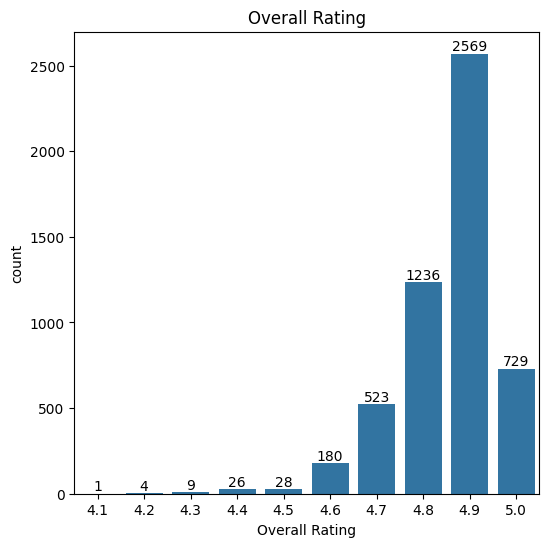

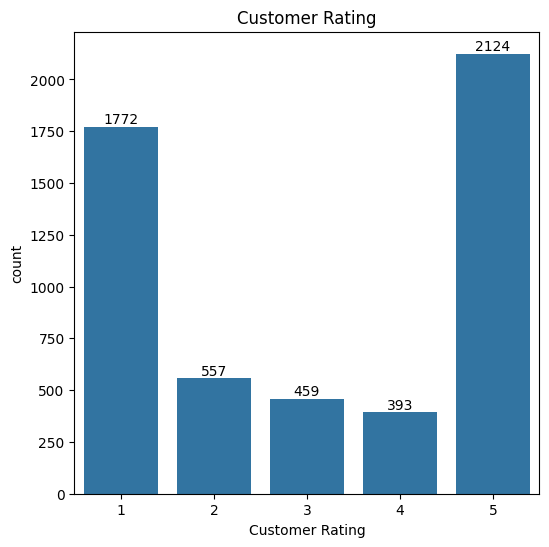

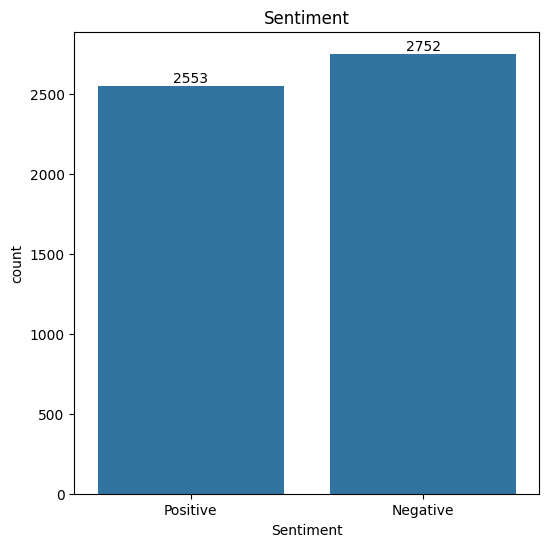

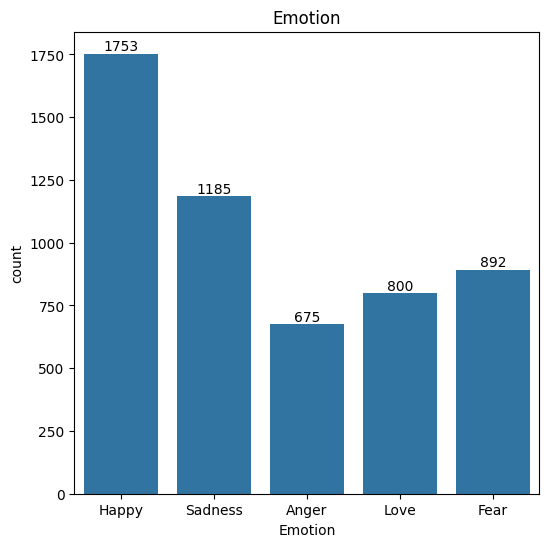

In [14]:
columns = ['Overall Rating','Customer Rating','Sentiment', 'Emotion']
for col in columns:
    plt.figure(figsize=(6,6))
    ax = sns.countplot(x=df[col])
    for label in ax.containers:
        ax.bar_label(label)
    plt.title(f'{col}')

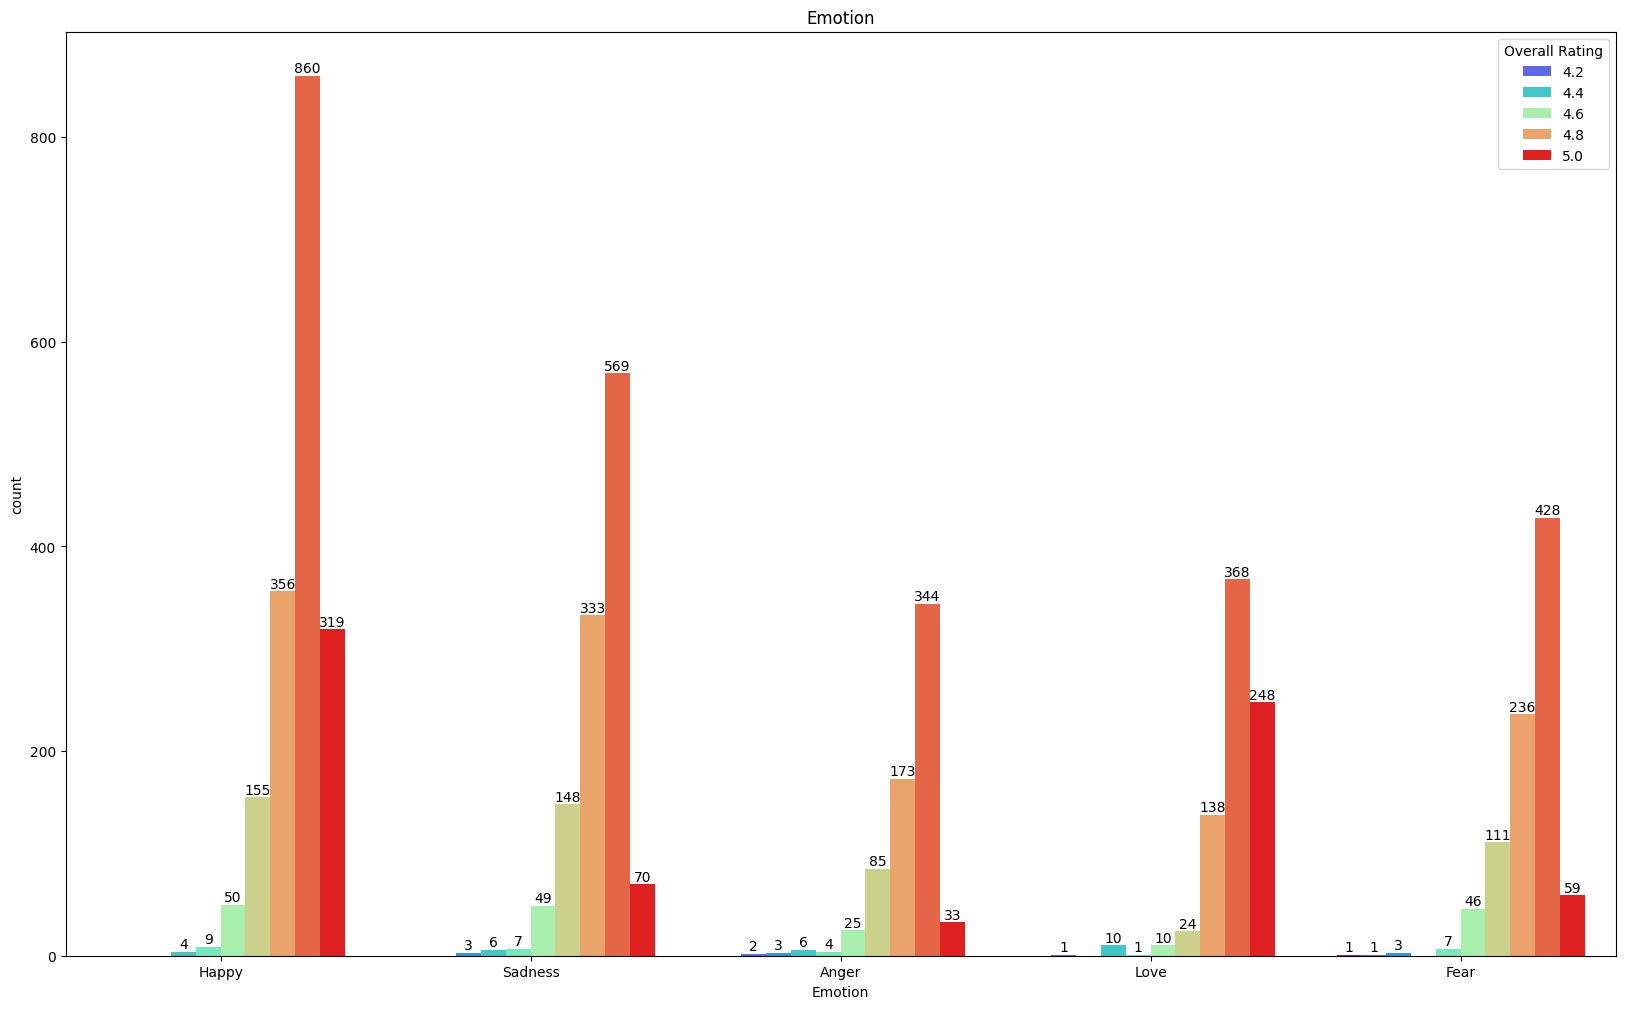

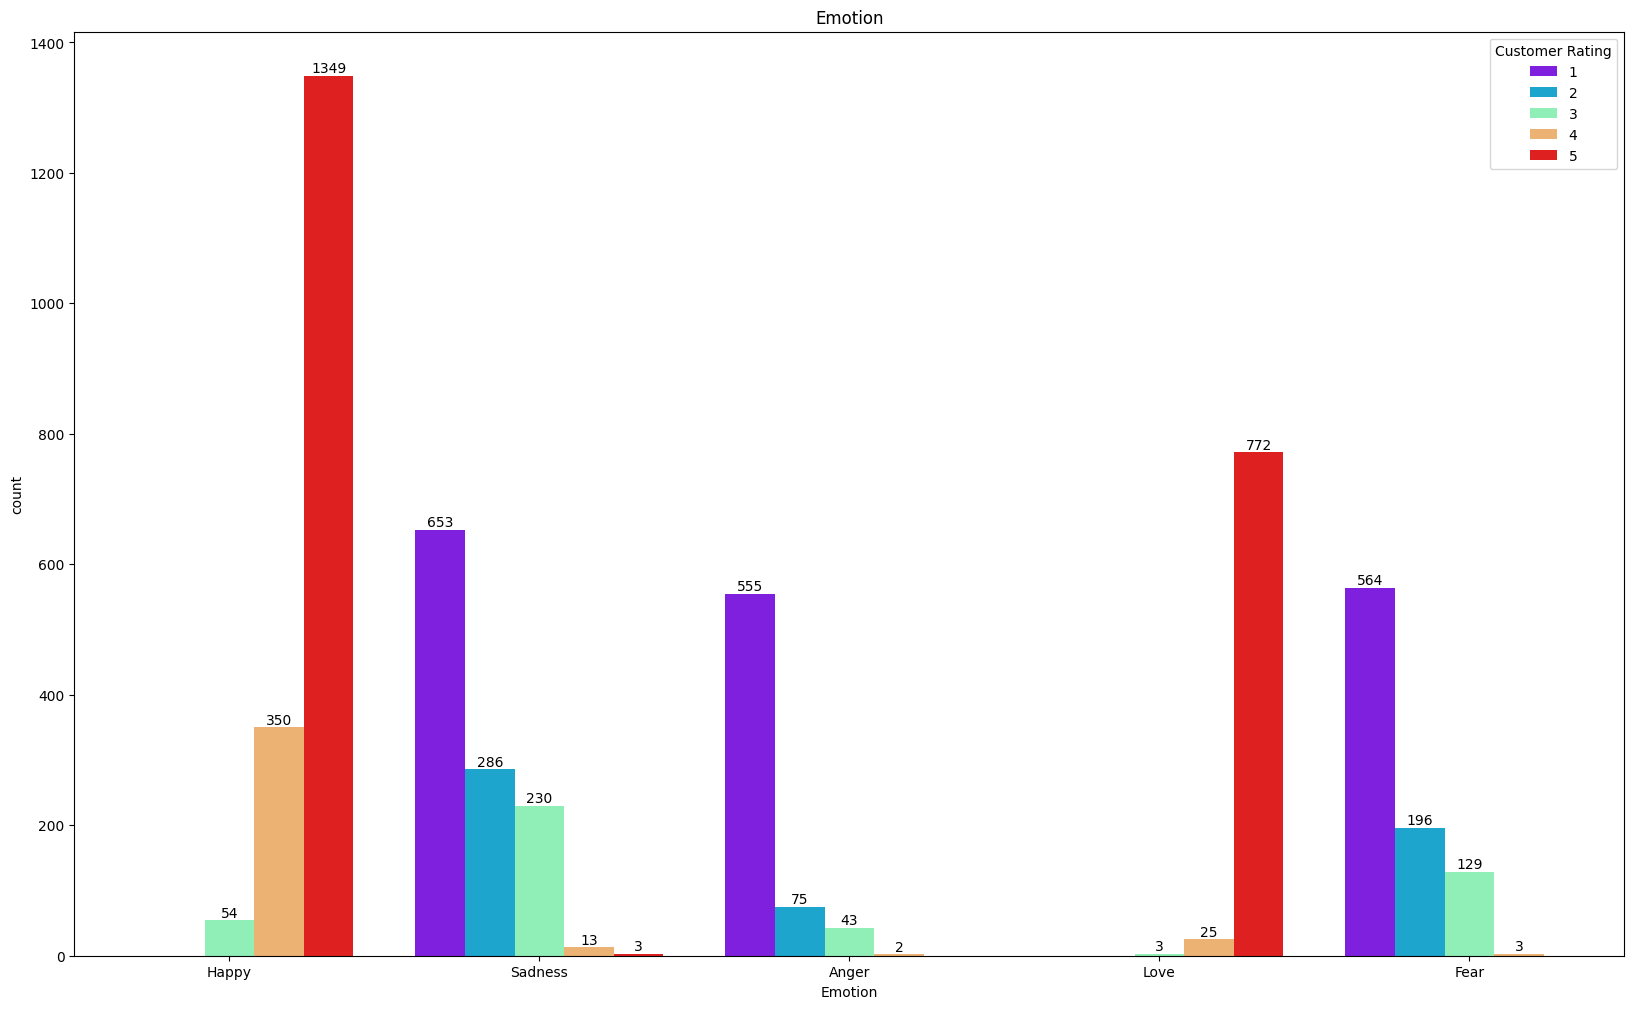

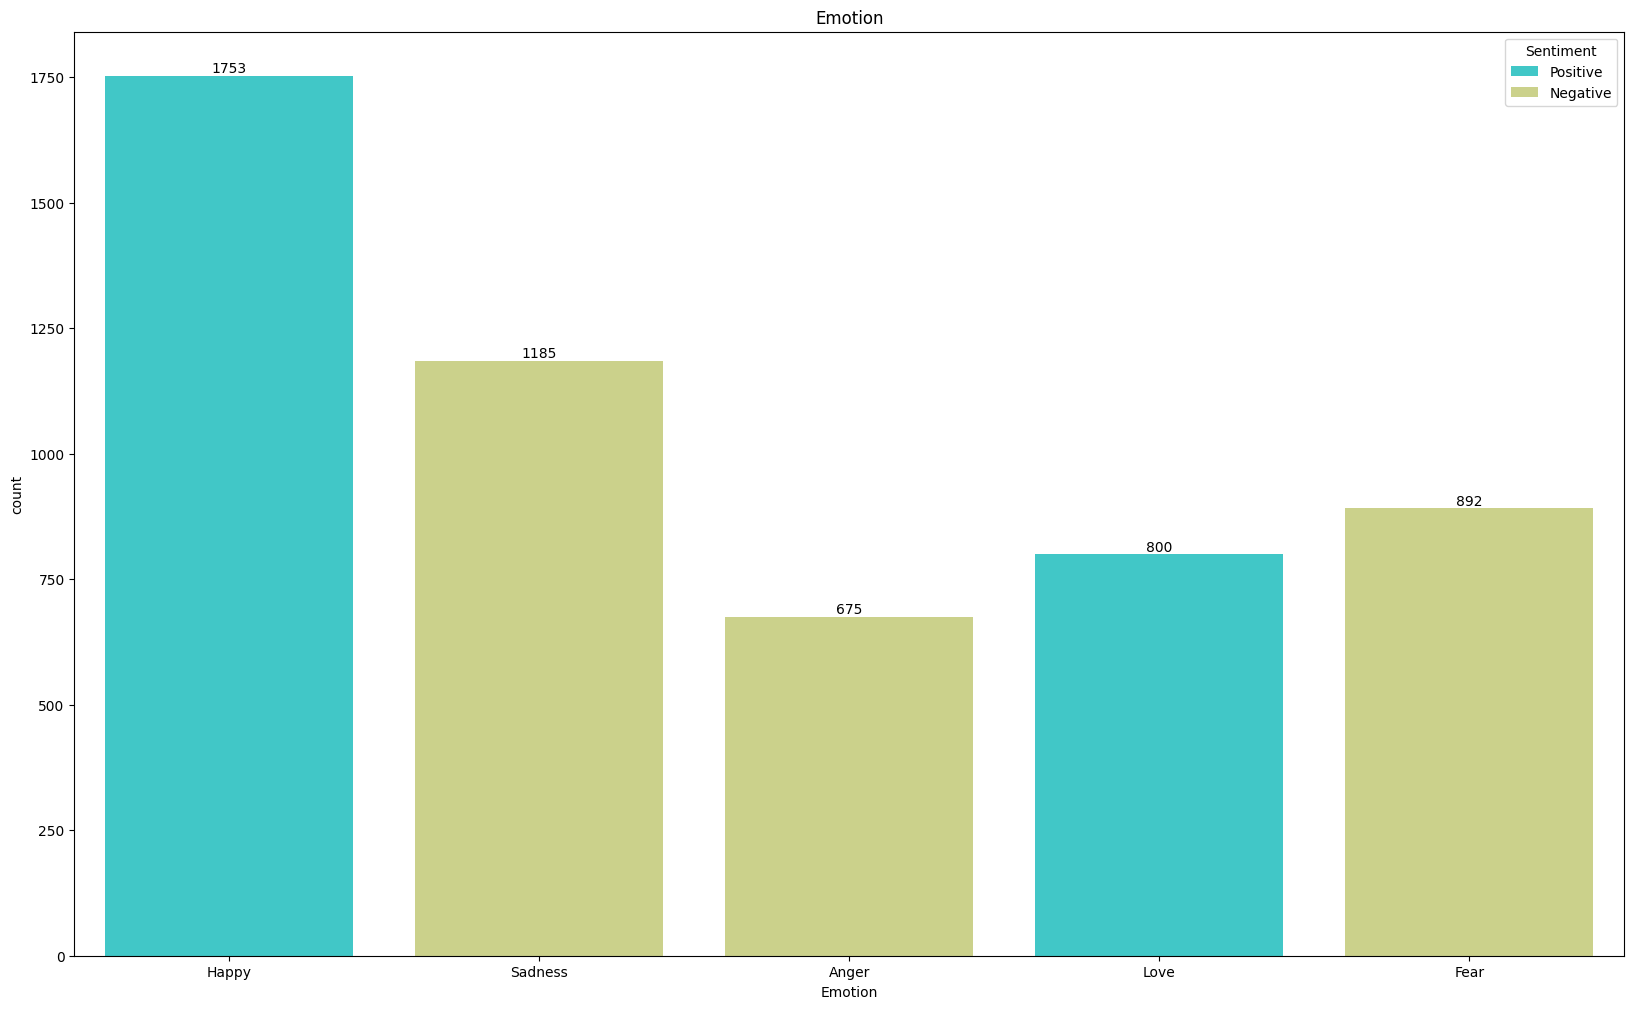

In [15]:
columns = ['Overall Rating','Customer Rating','Sentiment']
for hue in columns:
    plt.figure(figsize=(20,12))
    ax = sns.countplot(x= 'Emotion',hue= df[hue],data=df,palette='rainbow')
    for label in ax.containers:
        ax.bar_label(label)
    plt.title(f'{col}')

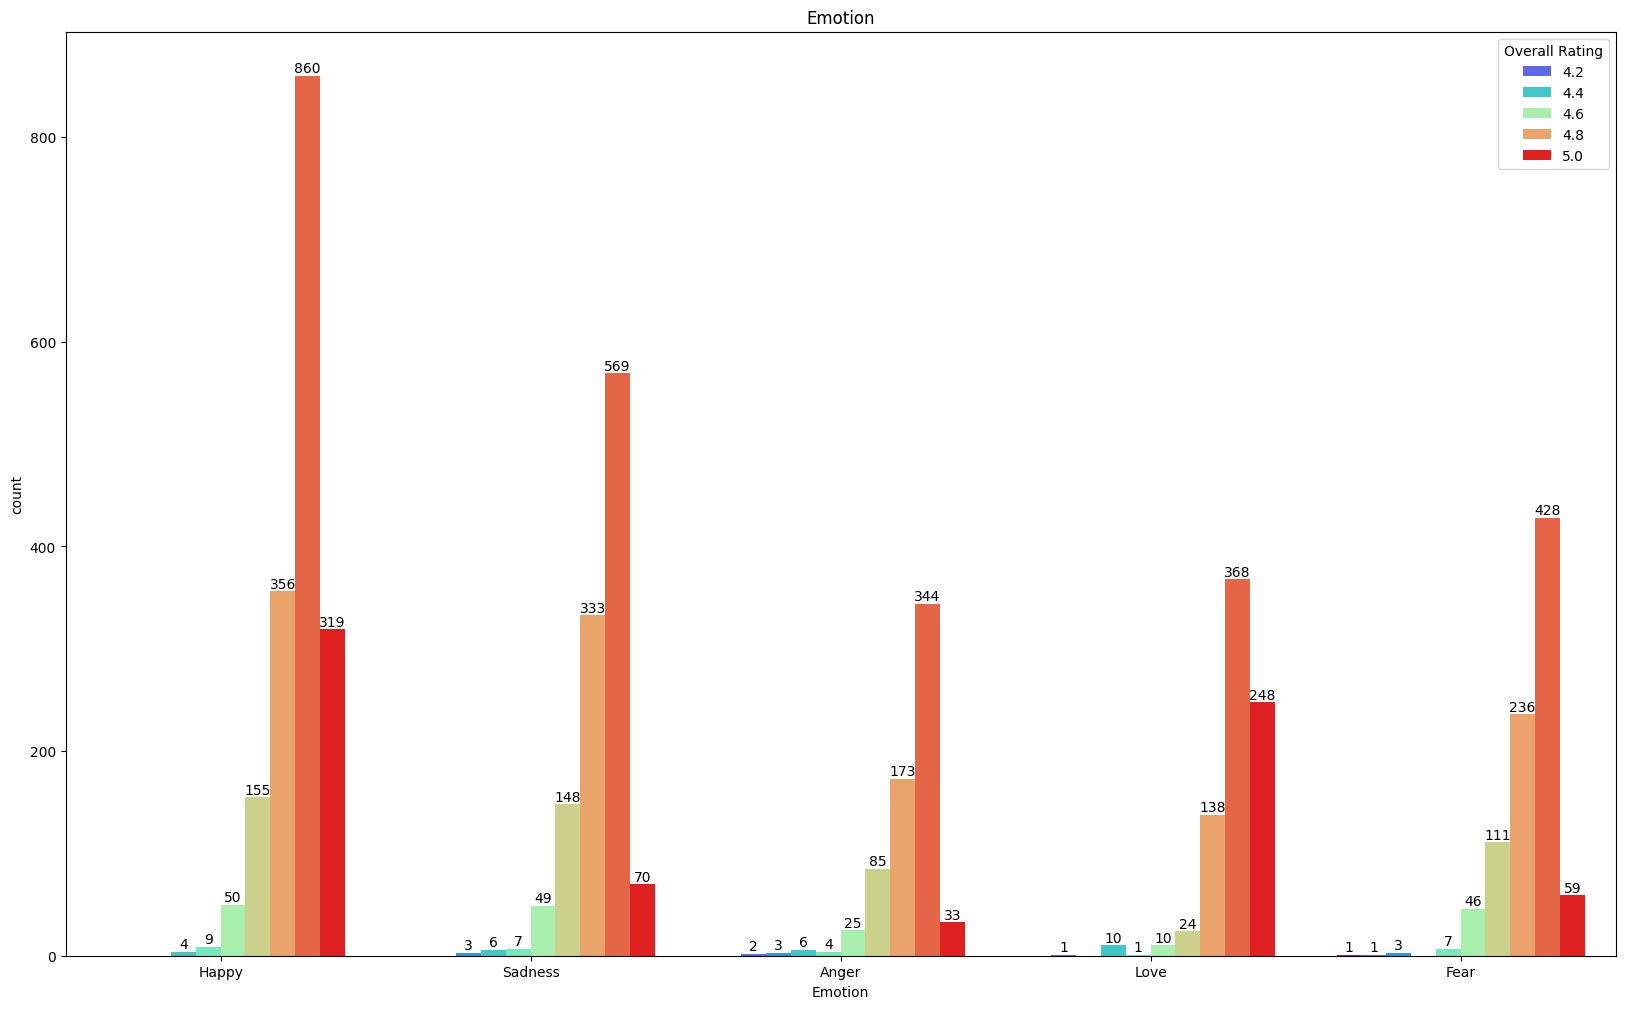

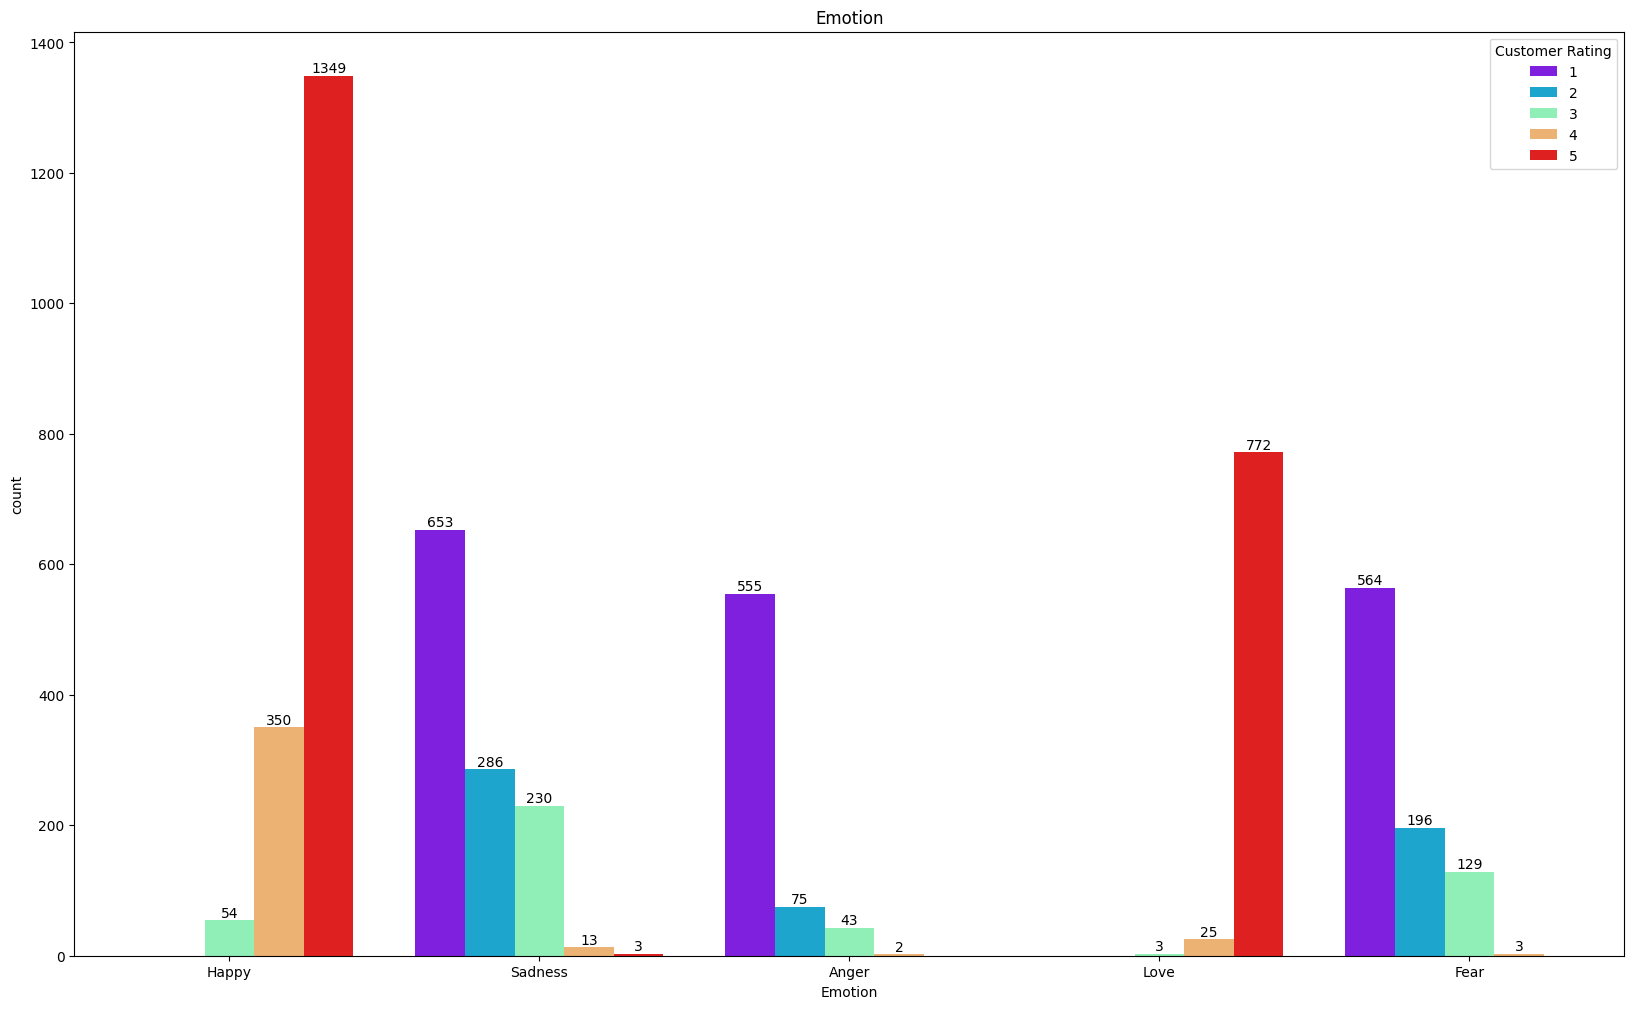

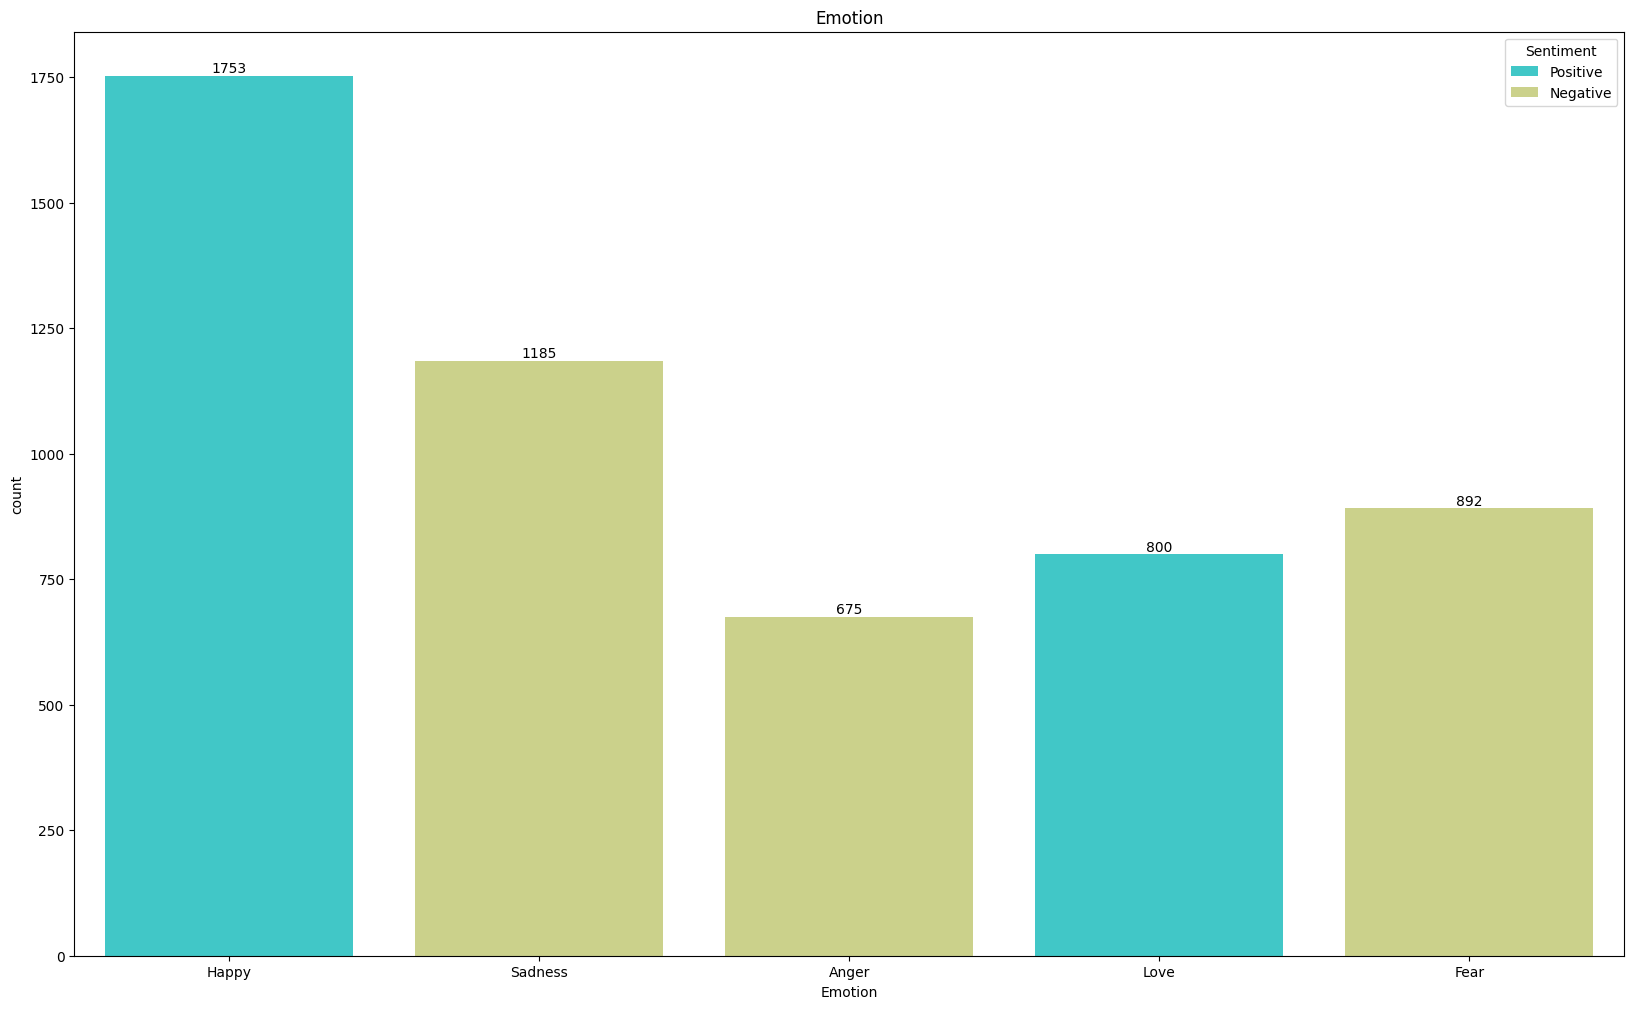

In [16]:
columns = ['Overall Rating','Customer Rating','Sentiment']
for hue in columns:
    plt.figure(figsize=(20,12))
    ax = sns.countplot(x= 'Emotion',hue= df[hue],data=df,palette='rainbow')
    for label in ax.containers:
        ax.bar_label(label)
    plt.title(f'{col}')

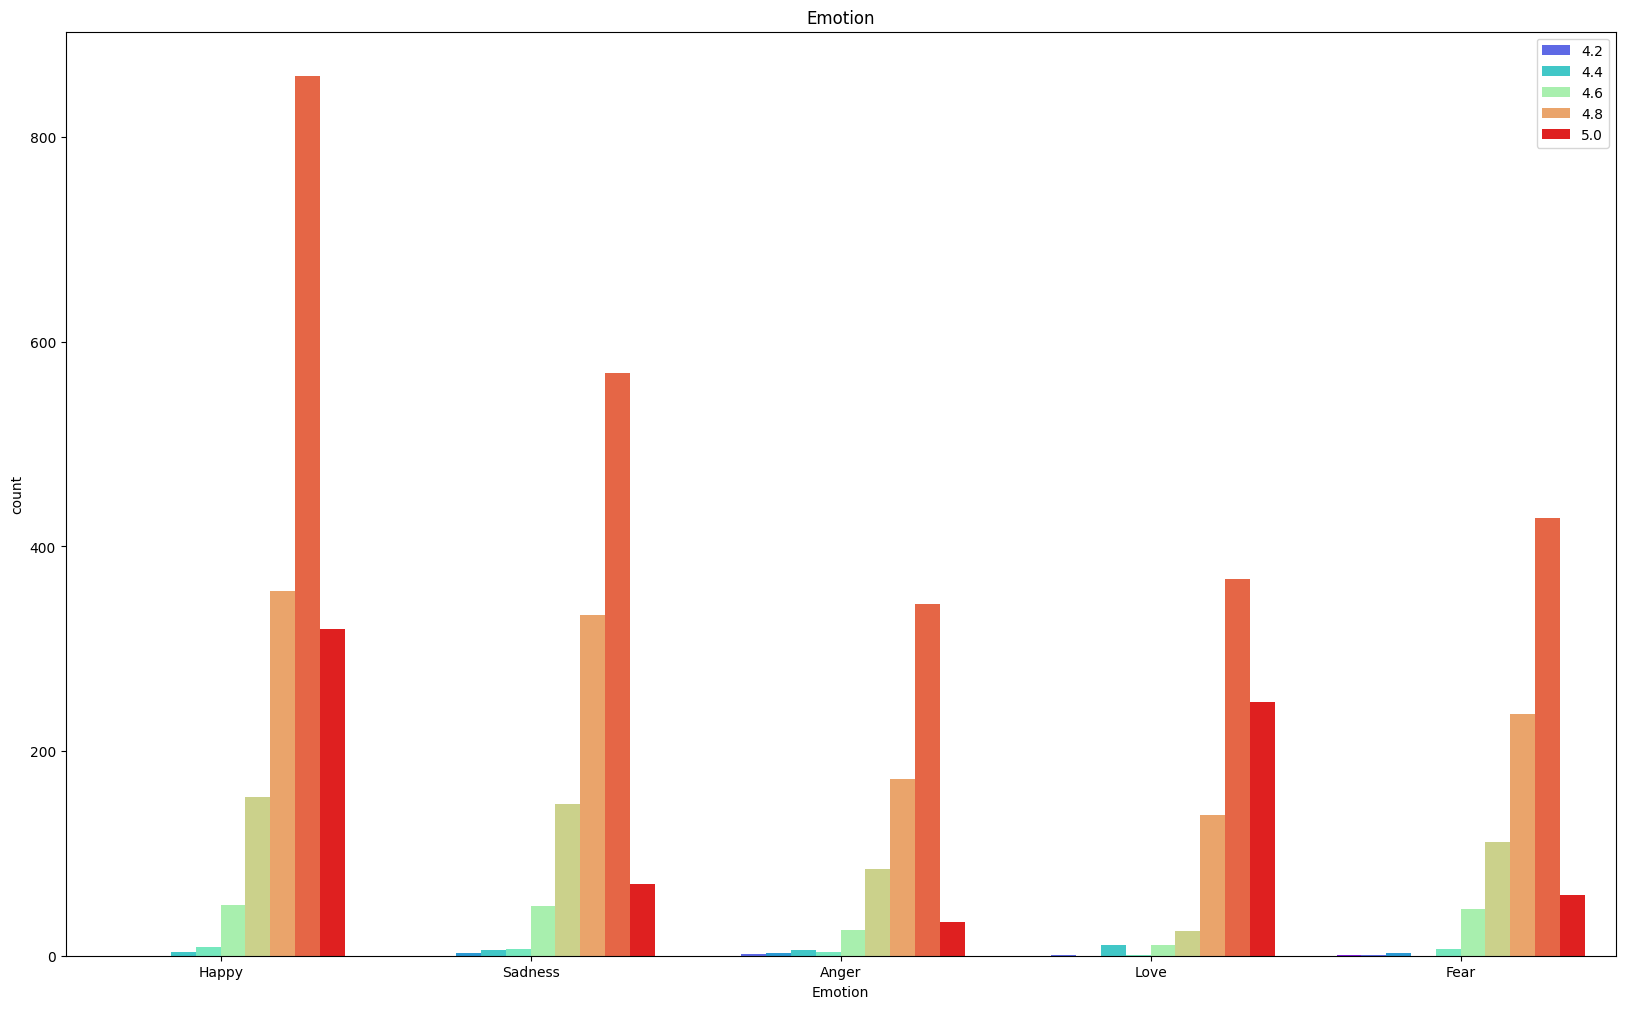

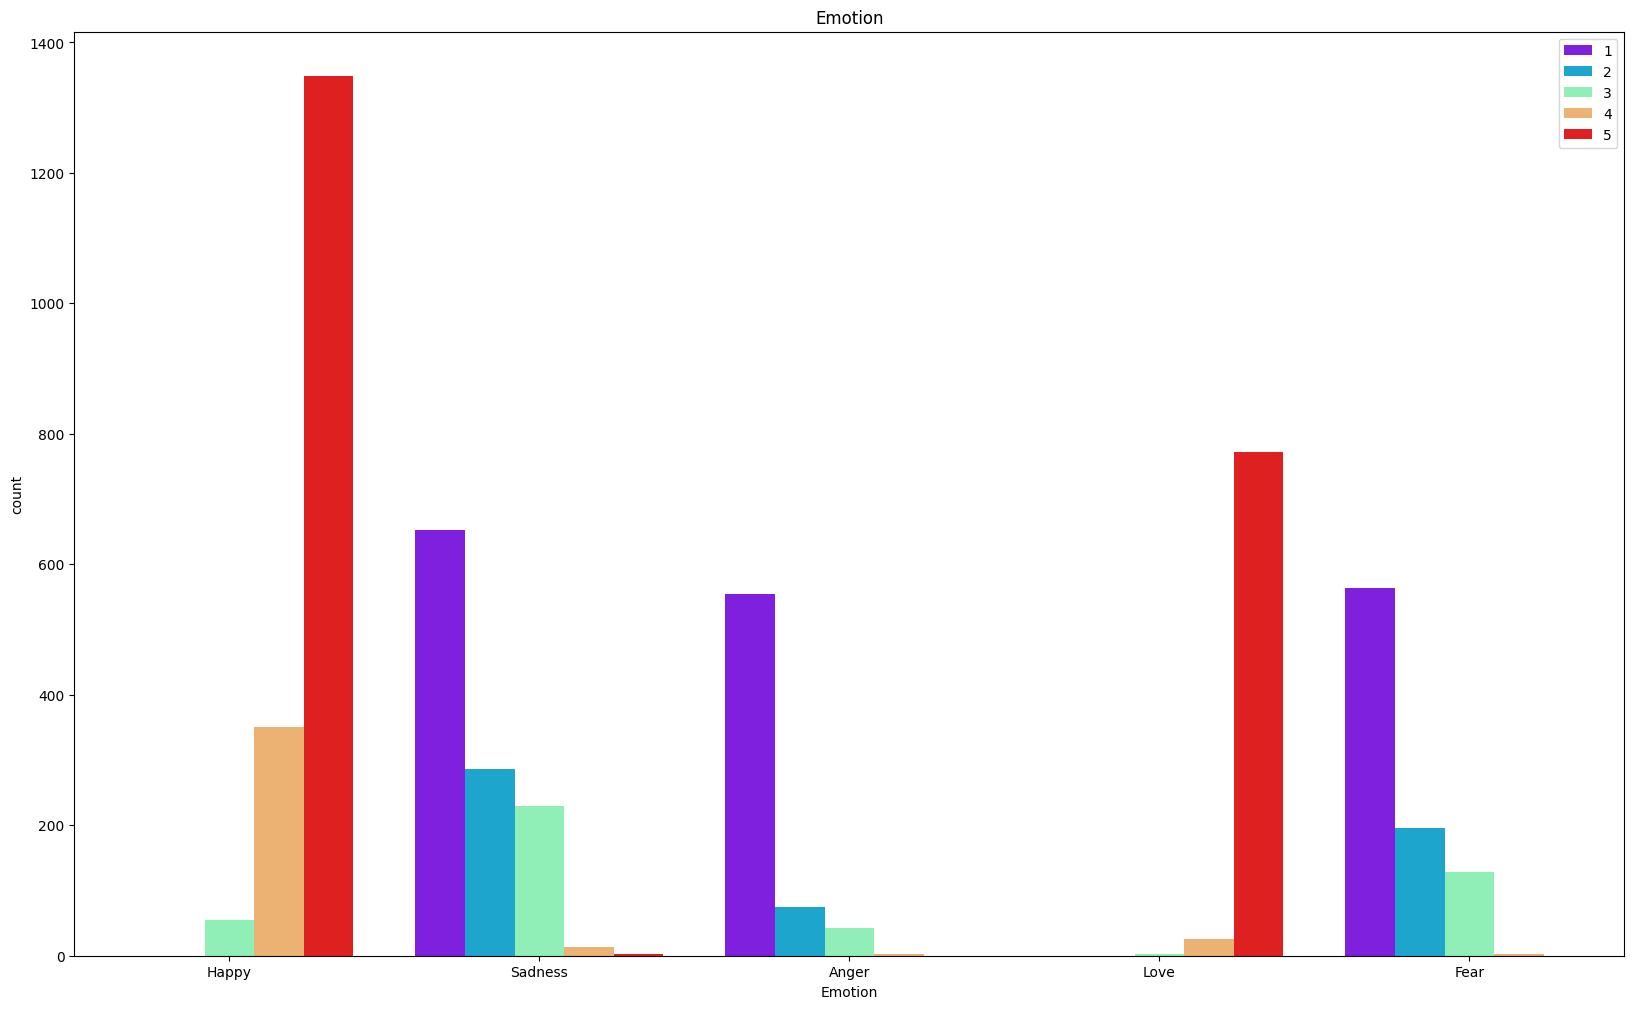

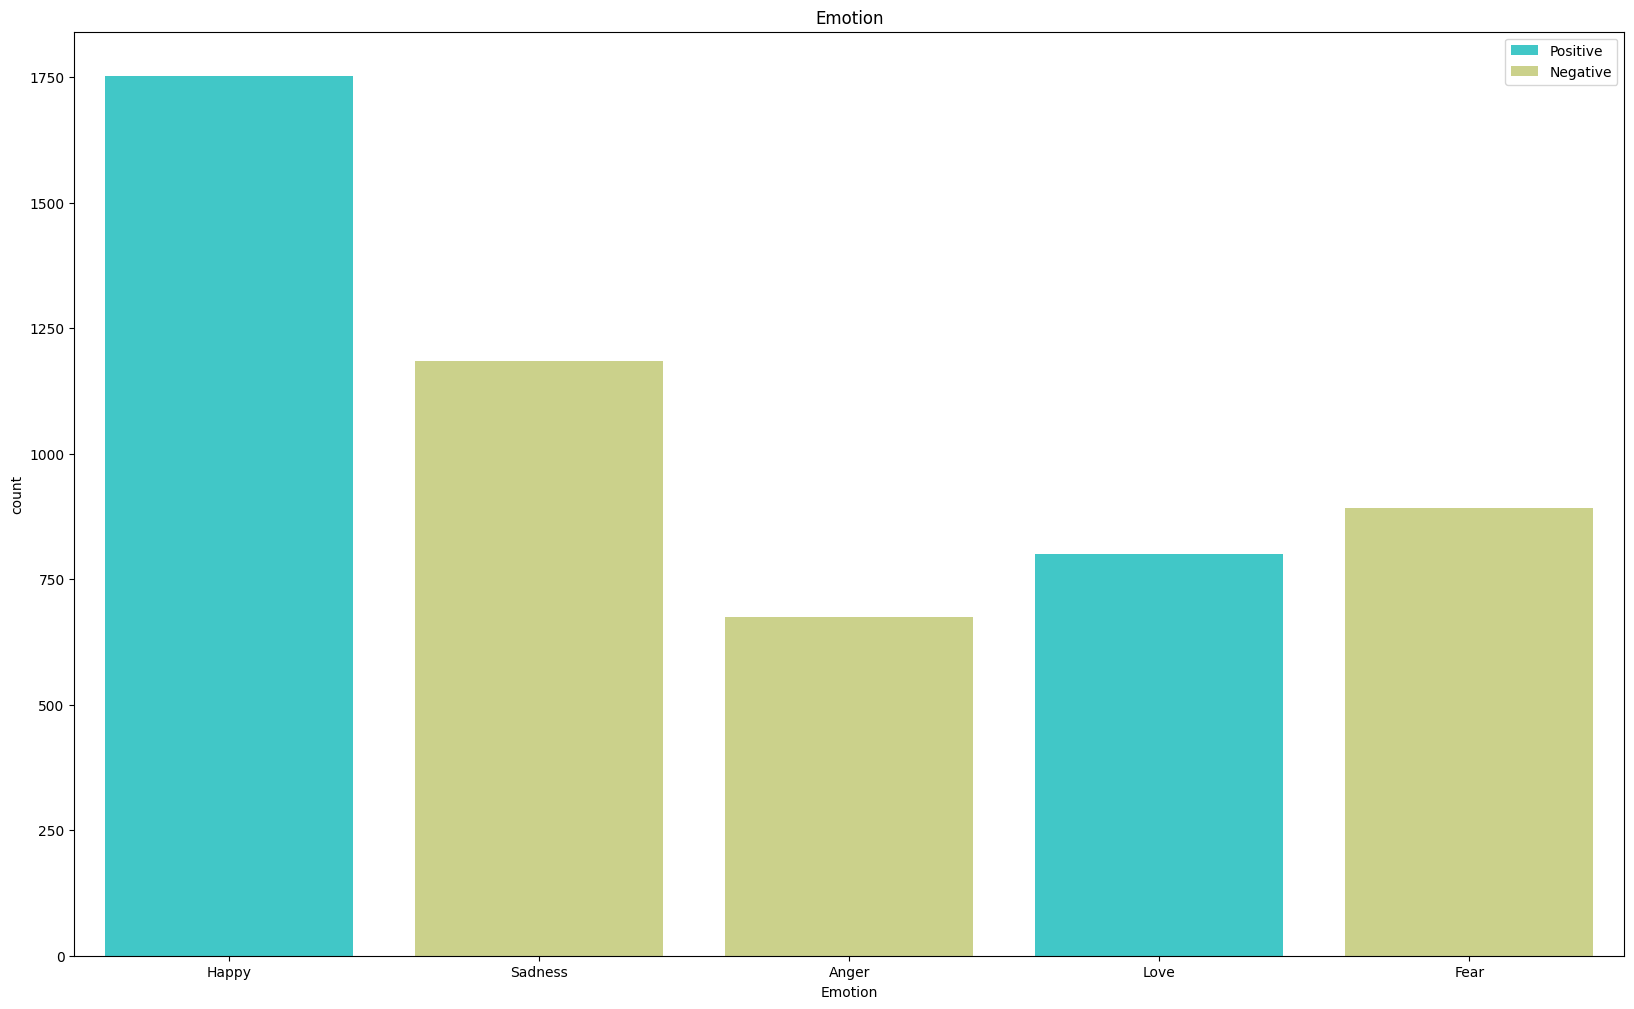

In [17]:
columns = ['Overall Rating','Customer Rating','Sentiment']
for hue in columns:
    plt.figure(figsize=(20,12))
    ax = sns.countplot(x= 'Emotion',hue= df[hue],data=df,palette='rainbow')
    plt.legend()
    plt.title(f'{col}')

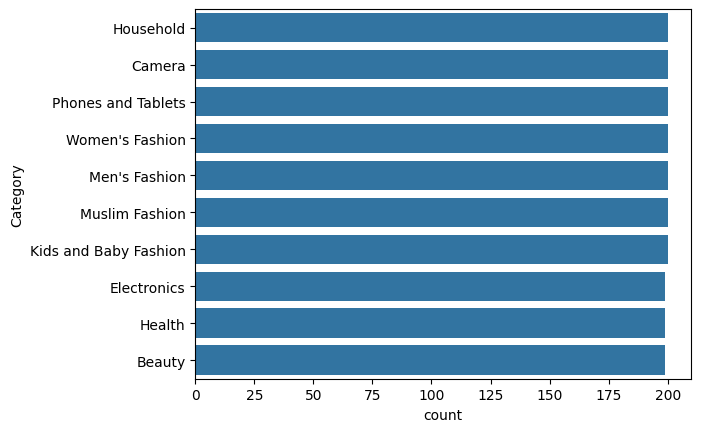

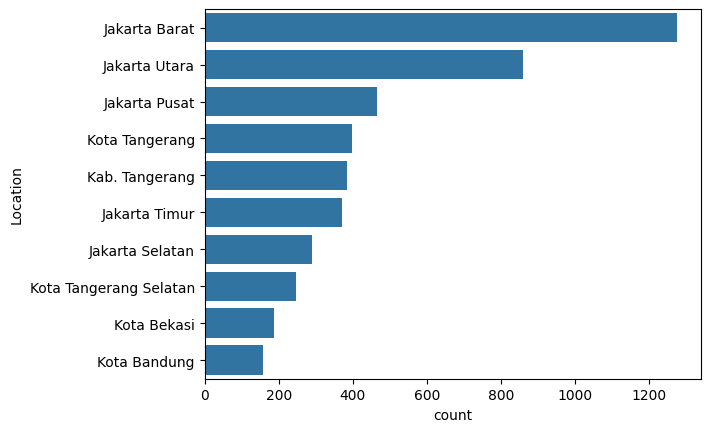

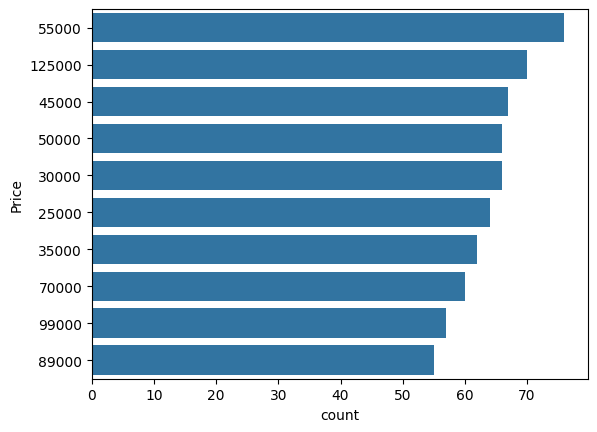

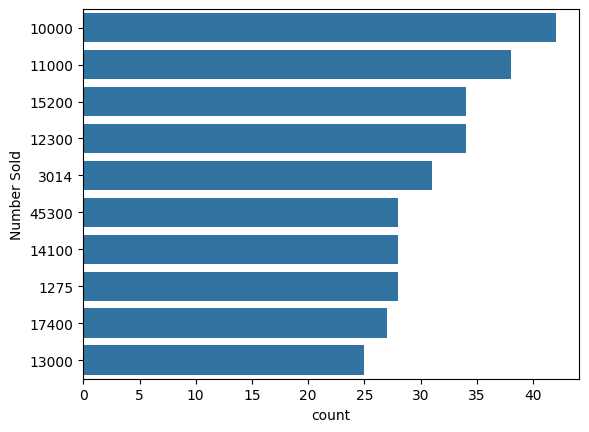

In [18]:
columns = ['Category','Location','Price','Number Sold']
for col in columns:
    sns.countplot(data=df, y=df[col], order=df[col].value_counts().nlargest(10).index)
    plt.show()

# Analysis

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Algortihm 1: Logistic regression

In [20]:
logit = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

In [21]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [22]:
y_predlog = logit.predict(X_test)

In [23]:
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.00      0.00      0.00       271
           2       0.35      0.85      0.50       535
           3       0.00      0.00      0.00       244
           4       0.26      0.22      0.24       342

    accuracy                           0.33      1592
   macro avg       0.12      0.21      0.15      1592
weighted avg       0.17      0.33      0.22      1592



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Algortihm 2: Random Forest Classification

In [24]:
rf = RandomForestClassifier(random_state=42)

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_predrf = rf.predict(X_test)

In [27]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47       200
           1       0.47      0.42      0.44       271
           2       0.80      0.87      0.83       535
           3       0.65      0.54      0.59       244
           4       0.52      0.61      0.56       342

    accuracy                           0.63      1592
   macro avg       0.59      0.57      0.58      1592
weighted avg       0.62      0.63      0.62      1592



In [28]:
importances = rf.feature_importances_
columns = x.columns
i = 0
while i < len(columns):
    print(columns[i],'=',round(importances[i]*100,2),"%")
    i += 1

Category = 11.48 %
Location = 8.98 %
Price = 16.46 %
Overall Rating = 5.41 %
Number Sold = 17.63 %
Customer Rating = 18.71 %
Sentiment = 21.31 %


# Confusion Matrix

In [29]:
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

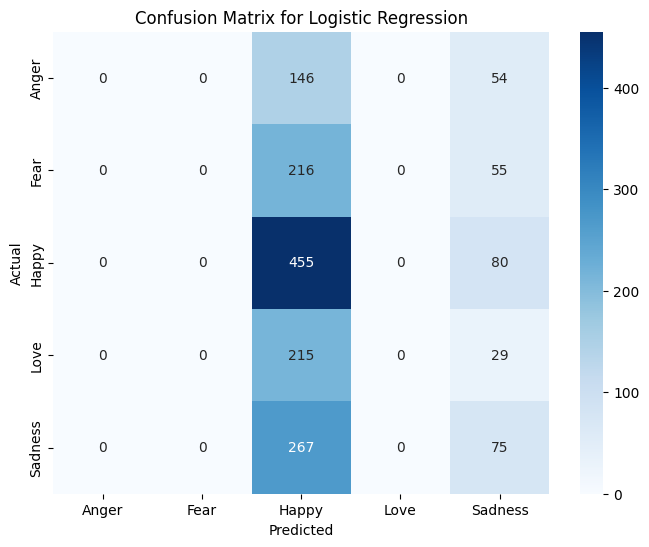

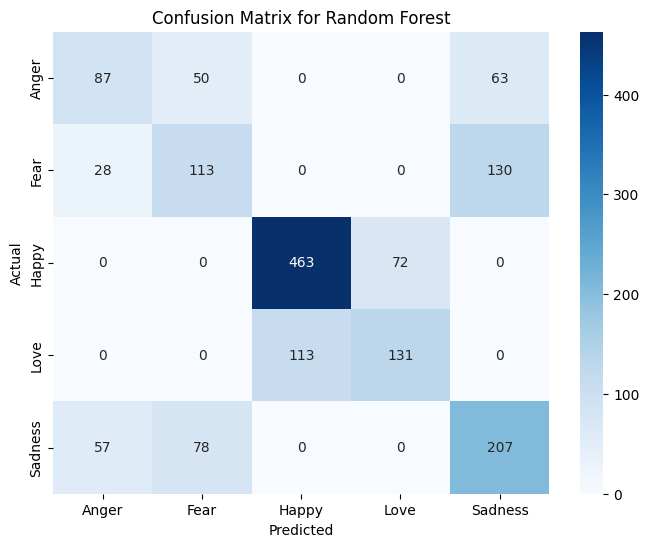

In [30]:
conf_matrixlog = confusion_matrix(y_test, y_predlog)
conf_matrixrf = confusion_matrix(y_test, y_predrf)
plot_confusion_matrix(conf_matrixlog, label_encoders['Emotion'].classes_, "Logistic Regression")
plot_confusion_matrix(conf_matrixrf, label_encoders['Emotion'].classes_, "Random Forest")